<a href="https://colab.research.google.com/github/vjha38910/vjtest/blob/master/iplData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # for data manipulation
import numpy as np
from matplotlib import pyplot as plt # for visulalization
import seaborn as sns # for visualization

In [2]:
ipl=pd.read_csv('matches.csv')

In [ ]:
ipl.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [ ]:
ipl.shape # No of rows and columns

(756, 18)

In [ ]:
ipl['player_of_match'].value_counts() # fequency count of man of the match awards

In [ ]:
ipl['player_of_match'].value_counts()[:10] #top 10 player of the match counts


CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [ ]:
list(ipl['player_of_match'].value_counts()[:10].keys()) # top tem players names list

<BarContainer object of 6 artists>

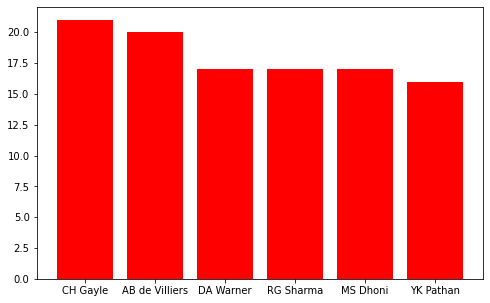

In [ ]:
# get bar chart of max man of the matches
plt.figure(figsize=(8,5))
plt.bar(list(ipl['player_of_match'].value_counts()[:6].keys()),list(ipl['player_of_match'].value_counts()[:6]),color='r') # 1st params categoricaldata , 2nd param numerical data

In [ ]:
ipl['result'].value_counts() # frequency results

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [ ]:
# bat first and win
batting_first=ipl[ipl['win_by_runs']!= 0]
batting_first.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


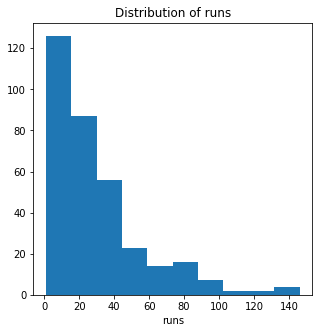

In [ ]:
# making a histogram for neumerical column visualization
plt.figure(figsize=(5,5)) # set dimension
plt.hist(batting_first['win_by_runs'],bins=10) # passing column for which i want histogram what is the use of bins
plt.title("Distribution of runs")
plt.xlabel("runs")
plt.show()

In [ ]:
batting_first['winner'].value_counts() # which country has won most after batting first

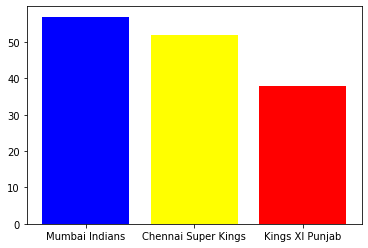

In [ ]:
# bar chart of team winning post batting first top 3
plt.figure(figsize=(6,4))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","red"])
plt.show()

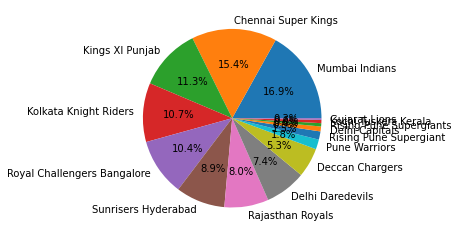

In [ ]:
# win % of above data
plt.figure(figsize=(4,6))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')# autopct for % calculation
plt.show()

In [ ]:
# second batting diy
batting_second=ipl[ipl['win_by_runs']== 0]

In [ ]:
batting_second.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
#toss winner won the match
np.sum(ipl['toss_winner']==ipl['winner'])

393

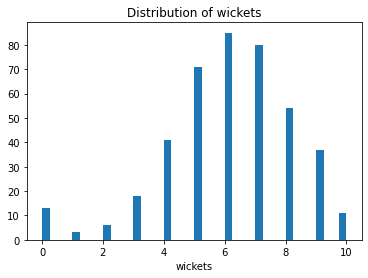

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(batting_second['win_by_wickets'],bins=40)
plt.title("Distribution of wickets")
plt.xlabel("wickets")
plt.show()

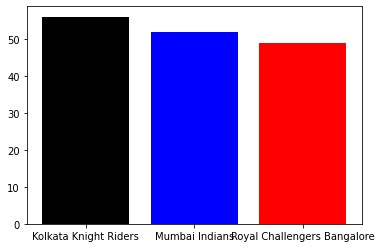

In [ ]:
# bar chart of team winning post bowling first top 3
plt.figure(figsize=(6,4))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=['black','blue','red'])
plt.show()


In [ ]:
# win % of above data
plt.figure(figsize=(6,6))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),
        autopct='%0.1f%%')# autopct for % calculation
plt.show()

In [ ]:
# chking nullvalues
ipl.isnull().sum()

In [ ]:
# number mathes per season
ipl['season'].value_counts()

Text(0.5, 1.0, 'Number of matches per season')

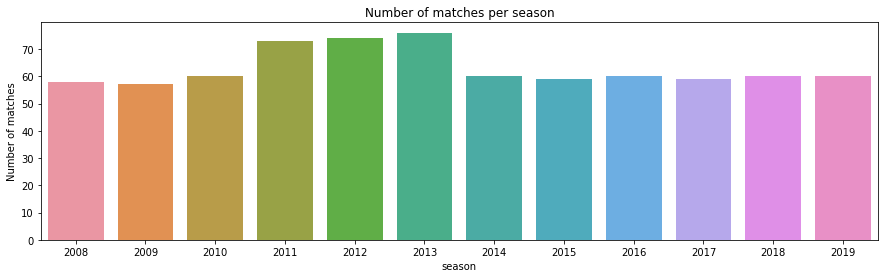

In [3]:
plt.figure(figsize=(15,4))
#plt.bar(list(ipl['season'].value_counts().keys()),list(ipl['season'].value_counts()))
sns.countplot(x='season',
              data=ipl, order= ipl['season'].value_counts().index.sort_values())
plt.xlabel('season')
plt.ylabel('Number of matches')
plt.title('Number of matches per season')

In [4]:
np.sum(ipl['toss_winner'] == ipl['winner'])

393

In [ ]:
ipl.info()

In [ ]:
mkckld

In [ ]:
number_of_matches_per_season = ipl.groupby('season').id.count()
number_of_matches_per_season

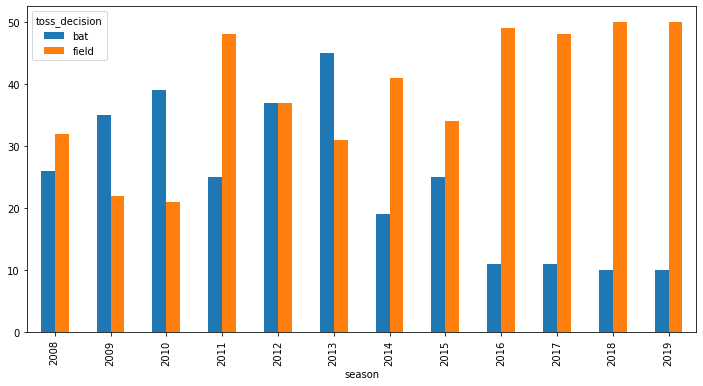

In [6]:
#ipl.groupby('season').toss_decision.value_counts().sort_index()
toss_unstack= ipl.groupby('season').toss_decision.value_counts().sort_index().unstack() #converted the values of toss_decision (that is, bat and field) into separate columns.
#plt.figure(figsize=(7,4))
#plt.bar(toss_unstack,height) 
#plt.xlabel("season")
#plt.ylabel("numbers")
#plt.title("Toss decision")
#+type(toss_unstack)
toss_unstack.plot(kind='bar',figsize=(12,6))

In [95]:
# find unique values in column
ipl['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [7]:
filter1=(ipl['win_by_wickets'] == 0) & (ipl['result'] == 'normal')

In [10]:
win_batting_first= ipl[filter1].groupby('season').winner.count()/number_of_matches_per_season

In [12]:
filter2=(ipl['win_by_runs'] == 0) & (ipl['result'] == 'normal')
win_batting_second= ipl[filter2].groupby('season').winner.count()/number_of_matches_per_season

In [113]:
combined_win= pd.concat([win_batting_first,win_batting_second],axis=1)
combined_win.columns= ['batting_first','batting_secomd']
combined_win

,batting_first,batting_secomd
season,,
2008,0.413793,0.586207
2009,0.473684,0.508772
2010,0.516667,0.466667
2011,0.452055,0.534247
2012,0.459459,0.540541
2013,0.486842,0.486842
2014,0.366667,0.616667
2015,0.542373,0.406780
2016,0.350000,0.650000


[Text(0, 0.5, 'Teams'), Text(0.5, 0, 'Number of matches')]

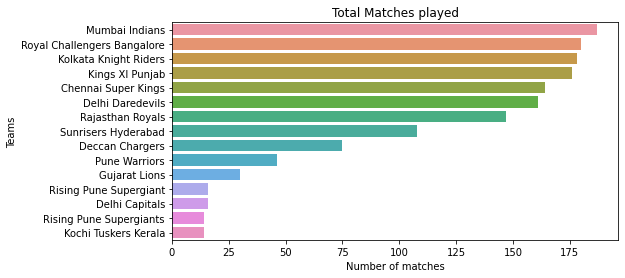

In [19]:
total_match_played=(ipl['team1'].value_counts() + ipl['team2'].value_counts() ).sort_values(ascending = False)
plt.figure(figsize=(8,4))
plt.title('Total Matches played')
total_matches_played_plot= sns.barplot(y= total_match_played.index, x= total_match_played)
total_matches_played_plot.set(ylabel='Teams', xlabel='Number of matches')


In [ ]:
ipl.groupby('season').tail(1).sort_values('season',ascending=True)

In [ ]:
# Decision to     kd                                            

In [68]:
# load deliveries csv 
deliveries= pd.read_csv('deliveries.csv')
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [71]:
deliveries.columns 

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')